In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Conv2D

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
Classifier=Sequential()

In [3]:
Classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [4]:
Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
Classifier.add(Flatten())

In [6]:
Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 4, activation = 'softmax'))

In [7]:
Classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Deep Learning/pokemon dataset/pokemon-mini/smalldb/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 751 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Deep Learning/pokemon dataset/pokemon-mini/smalldb/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 46 images belonging to 4 classes.


In [12]:
Classifier.fit_generator(training_set,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 1500)


Epoch 1/20
24/24 [==============================] - 470s 20s/step - loss: 0.8871 - accuracy: 0.6245 - val_loss: 0.9075 - val_accuracy: 0.6522
Epoch 2/20
24/24 [==============================] - 461s 19s/step - loss: 0.5141 - accuracy: 0.8282 - val_loss: 0.1888 - val_accuracy: 0.8696
Epoch 3/20
24/24 [==============================] - 461s 19s/step - loss: 0.3958 - accuracy: 0.8655 - val_loss: 0.5139 - val_accuracy: 0.8478
Epoch 4/20
24/24 [==============================] - 461s 19s/step - loss: 0.3217 - accuracy: 0.8921 - val_loss: 0.6863 - val_accuracy: 0.8696
Epoch 5/20
24/24 [==============================] - 463s 19s/step - loss: 0.2626 - accuracy: 0.9201 - val_loss: 0.3785 - val_accuracy: 0.8478
Epoch 6/20
24/24 [==============================] - 462s 19s/step - loss: 0.2708 - accuracy: 0.9108 - val_loss: 0.2501 - val_accuracy: 0.8696
Epoch 7/20
24/24 [==============================] - 462s 19s/step - loss: 0.2250 - accuracy: 0.9201 - val_loss: 0.7870 - val_accuracy: 0.8478
Epoch

In [17]:
import numpy as np
from keras.preprocessing import image

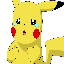

In [153]:
test_image=image.load_img('C:/Users/gaurav sahani/Desktop/Deep Learning/pokemon dataset/pokemon-mini/smalldb/test_set/pikachu/00000111.jpg', target_size = (64, 64))
test_image

In [154]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis = 0)

In [155]:
result = Classifier.predict(test_image)
result

array([[0., 0., 1., 0.]], dtype=float32)

In [156]:
result=result.astype(np.int64)
result

array([[0, 0, 1, 0]], dtype=int64)

In [157]:
if (result == np.array([1 ,0, 0, 0])).all():
     print("The Pokemon is Bulbasaur")
elif (result == np.array([0, 1, 0, 0])).all():
     print("The Pokemon is Charmeleon")
elif (result == np.array([0, 0, 1, 0])).all():
     print("The Pokemon is Pikachu")
else: 
     print("The Pokemon is squirtle")
      


The Pokemon is Pikachu
